# Notebook 3:  Redes de Kohonen y SOM (Self organized maps)
En este notebook vamos a implementar el algoritmo de clustering SOM en R. El objetivo es entender como funciona este algoritmo y  aprender a utilizarlo con un ejemplo simple. Recuerde instalar previamente el paquete kohonen en R.



In [1]:
library(kohonen)
set.seed(7)

#ruta datos
#lee datos del archivo de texto como una matriz. La primera #columna se utiliza como vector de nombres de las filas
datos <-read.table("/home/mauricio/Escritorio/INFO267-master/milk1.dat",row.names=1,dec=".",header=TRUE)
datos <- as.data.frame(datos)
summary(datos)

     WATER          PROTEIN            FAT           LACTOSE     
 Min.   :44.90   Min.   : 0.600   Min.   : 1.00   Min.   :0.000  
 1st Qu.:71.30   1st Qu.: 3.000   1st Qu.: 3.40   1st Qu.:2.700  
 Median :82.00   Median : 5.900   Median : 6.30   Median :4.700  
 Mean   :78.18   Mean   : 6.212   Mean   :10.31   Mean   :4.132  
 3rd Qu.:87.70   3rd Qu.: 9.700   3rd Qu.:13.10   3rd Qu.:5.600  
 Max.   :90.40   Max.   :12.300   Max.   :42.00   Max.   :6.900  
      ASH        
 Min.   :0.1000  
 1st Qu.:0.5300  
 Median :0.8000  
 Mean   :0.8632  
 3rd Qu.:1.1000  
 Max.   :2.3000  

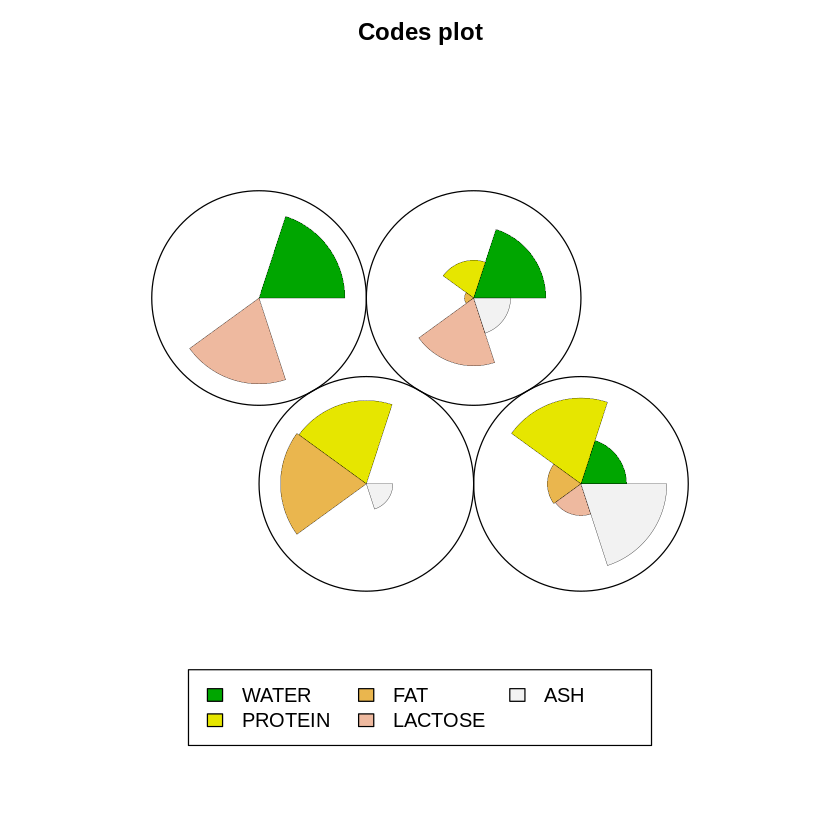

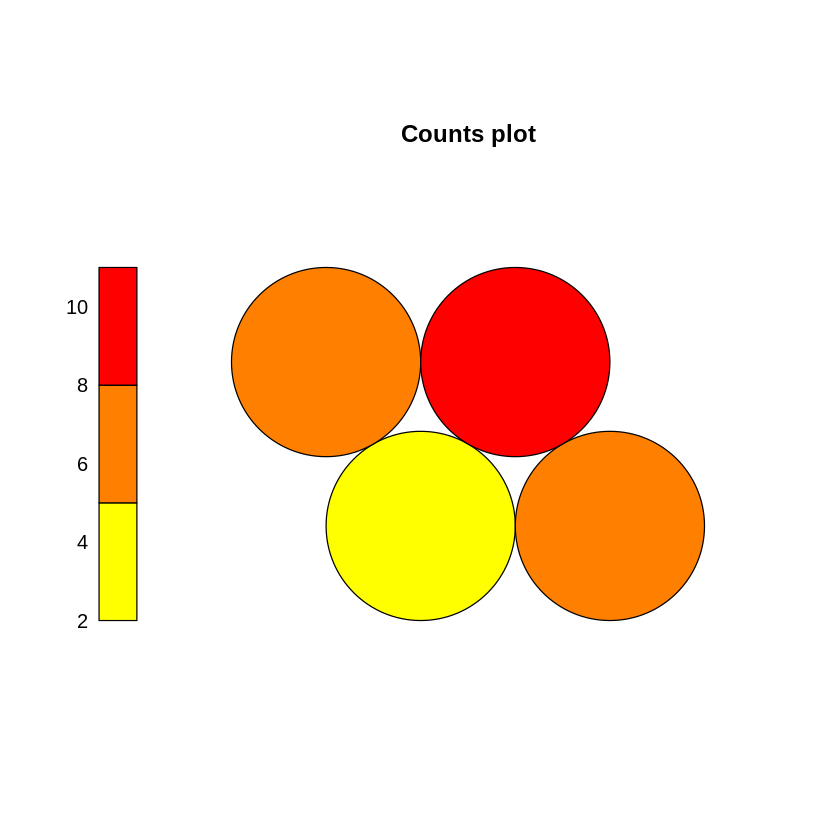

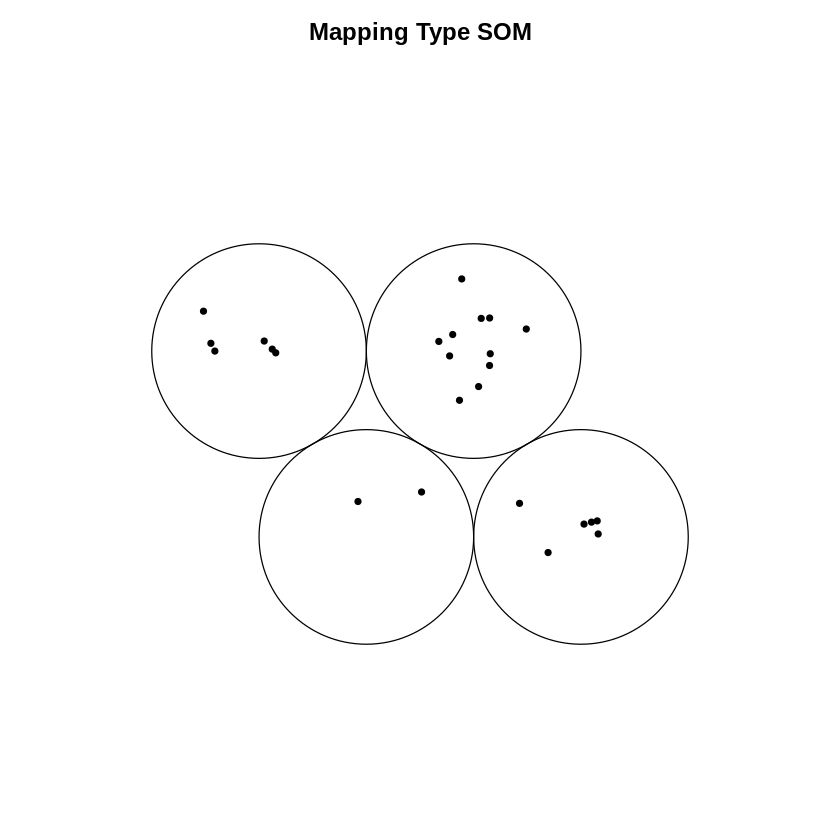

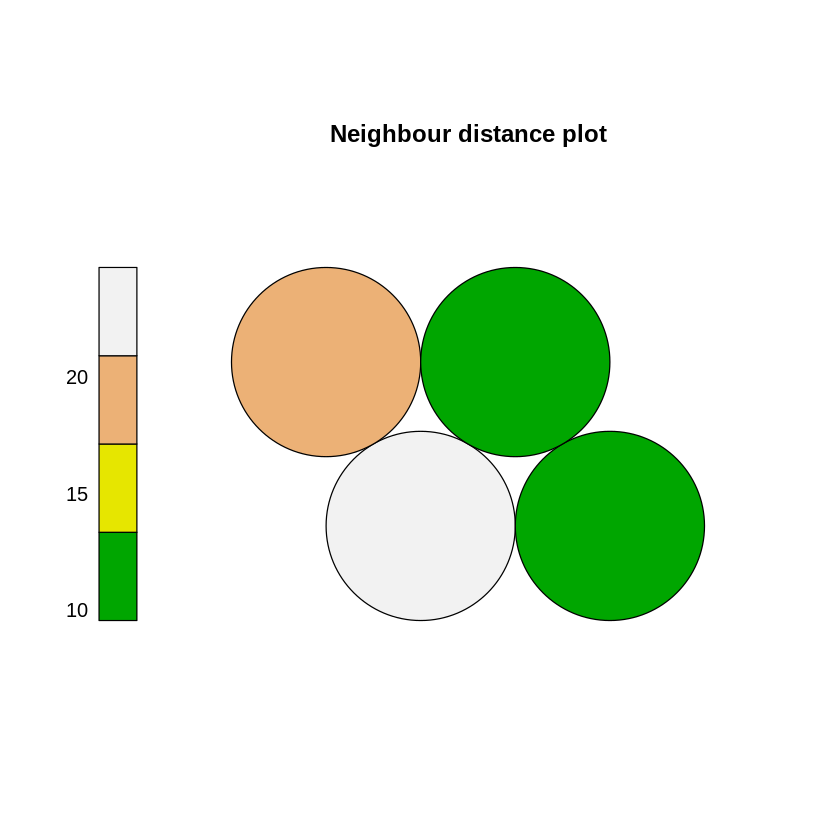

In [2]:
#create SOM grid
sommap <- som(scale(datos), grid = somgrid(2, 2, "hexagonal"))
plot(sommap)

colors <- function(n, alpha = 1) {
    rev(heat.colors(n, alpha))
}

plot(sommap, type = "counts", palette.name = colors, heatkey = TRUE)

plot(sommap, type = "mapping", pchs = 20, main = "Mapping Type SOM")

plot(sommap, type = "dist.neighbours", palette.name = terrain.colors)


Ejercicio 1: 
a) Explique como funciona el método som, describa parámetros de entrada y salida y los gráficos obtenidos.
b) Modifique parámetros de entrada. Interprete y comente los resultados obtenidos. 

In [3]:
- Codes plot: Muestra los pesos relacionados a los nodos. 
- Counts plot: Muestra la cantidad de objetos que son mapeados en cada uno de los nodos.
- Mappings type SOM: Muestra donde son mapeados los objetos.
- Neightbour distance plot: Muestra la suma de distancias de todos los vecinos cercanos.

El output corresponde a un som de dimensiones 2x2 .

ERROR: Error in parse(text = x, srcfile = src): <text>:1:9: unexpected symbol
1: - Codes plot
            ^


In [ ]:
mat <- matrix(sommap$codes[[1]], ncol=4,nrow=4,byrow=FALSE)

## use hierarchical clustering to cluster the codebook vectors
groups<-3
som.hc <- cutree(hclust(dist(mat)), groups)

#plot
plot(sommap, type="codes", bgcol=rainbow(groups)[som.hc])

#cluster boundaries
add.cluster.boundaries(sommap, som.hc)


Ejercicio 2: 
a) Explique como funciona esta nueva visualización.
b) Interprete y comente los resultados obtenidos. 

a)Se usa cutree para cortar el àrbol jerarquico.Posteriormente se usa add.cluster.boundaries para dibujar las lineas que permiten identificar los grupos asociados 

b)Los grupos de color azul deberían formar un solo grupo

Ejercicio 3: 
a) Proponga un nuevo conjunto de datos a los cuales aplicar este algoritmo. Justifique su elección
b) Realice las estimaciones y discuta sus resultados.

Se ha seleccionado un dataset que indica si existe o no la presencia de arritmia cardiaca y los clasifica entre 1 a 16 grupos (https://archive.ics.uci.edu/ml/datasets/Arrhythmia).
La motivación de revisar estos datos es poder visualizar la tendencia/comportamiento estadistico que se presentan en las personas por diferentes causas que van desde ataques de ansiedad a problemas al corazón.

In [17]:
ClusterPurity <- function(clusters, classes) {
  sum(apply(table(classes, clusters), 2, max)) / length(clusters)
}
datos <- read.table("/home/mauricio/Escritorio/arrhythmia.data",sep=",",header=FALSE)
datos <- as.data.frame(datos)
summary(datos)

       V1              V2               V3              V4        
 Min.   : 0.00   Min.   :0.0000   Min.   :105.0   Min.   :  6.00  
 1st Qu.:36.00   1st Qu.:0.0000   1st Qu.:160.0   1st Qu.: 59.00  
 Median :47.00   Median :1.0000   Median :164.0   Median : 68.00  
 Mean   :46.47   Mean   :0.5509   Mean   :166.2   Mean   : 68.17  
 3rd Qu.:58.00   3rd Qu.:1.0000   3rd Qu.:170.0   3rd Qu.: 79.00  
 Max.   :83.00   Max.   :1.0000   Max.   :780.0   Max.   :176.00  
                                                                  
       V5               V6              V7              V8              V9     
 Min.   : 55.00   Min.   :  0.0   Min.   :232.0   Min.   :108.0   Min.   :  0  
 1st Qu.: 80.00   1st Qu.:142.0   1st Qu.:350.0   1st Qu.:148.0   1st Qu.: 79  
 Median : 86.00   Median :157.0   Median :367.0   Median :162.0   Median : 91  
 Mean   : 88.92   Mean   :155.2   Mean   :367.2   Mean   :169.9   Mean   : 90  
 3rd Qu.: 94.00   3rd Qu.:175.0   3rd Qu.:384.0   3rd Qu.:179.0 

In [18]:
sommap <- som(scale(datos), grid = somgrid(5, 3, "hexagonal")) 
plot(sommap)
colors <- function(n, alpha = 1) {
    rev(heat.colors(n, alpha))
}



ERROR: Error in colMeans(x, na.rm = TRUE): 'x' debe ser numérico
